In [13]:
import pytest
import functools
import anndata
import mudata
from dance.data.base import Data
from dance.utils.wrappers import mudata_to_anndata
import numpy as np
# 模拟一个被装饰的函数
@mudata_to_anndata
def sample_function(data):
    return data

# 创建一个模拟的 MuData 对象
def create_mock_mudata():
    adata1 = anndata.AnnData(X=np.array([[1, 2], [3, 4]]))
    adata2 = anndata.AnnData(X=np.array([[5, 6], [7, 8]]))
    return mudata.MuData({'mod1': adata1, 'mod2': adata2})

# 测试用例
def test_mudata_to_anndata_with_mudata():
    mock_mudata = create_mock_mudata()
    result = sample_function(mock_mudata, "mod1")
    assert isinstance(result, Data)
    assert result.data.X.tolist() == [[1, 2], [3, 4]]

def test_mudata_to_anndata_with_mudata_different_mod():
    mock_mudata = create_mock_mudata()
    result = sample_function(mock_mudata, "mod2")
    assert isinstance(result, Data)
    assert result.data.X.tolist() == [[5, 6], [7, 8]]

def test_mudata_to_anndata_without_mudata():
    result = sample_function("some_other_data")
    assert result == "some_other_data"

def test_mudata_to_anndata_with_mudata_without_mod_key():
    mock_mudata = create_mock_mudata()
    result = sample_function(mock_mudata)
    assert result == mock_mudata

def test_mudata_to_anndata_with_invalid_mod_key():
    mock_mudata = create_mock_mudata()
    result = sample_function(mock_mudata, "invalid_key")
    assert result == (mock_mudata, "invalid_key")

# 如果装饰器应该处理多个参数，可以添加这个测试
def test_mudata_to_anndata_with_multiple_args():
    mock_mudata = create_mock_mudata()
    result = sample_function(mock_mudata, "mod1", "extra_arg")
    assert isinstance(result, Data)
    assert result.data.X.tolist() == [[1, 2], [3, 4]]

/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656962/1237777838.py:35: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from current font.

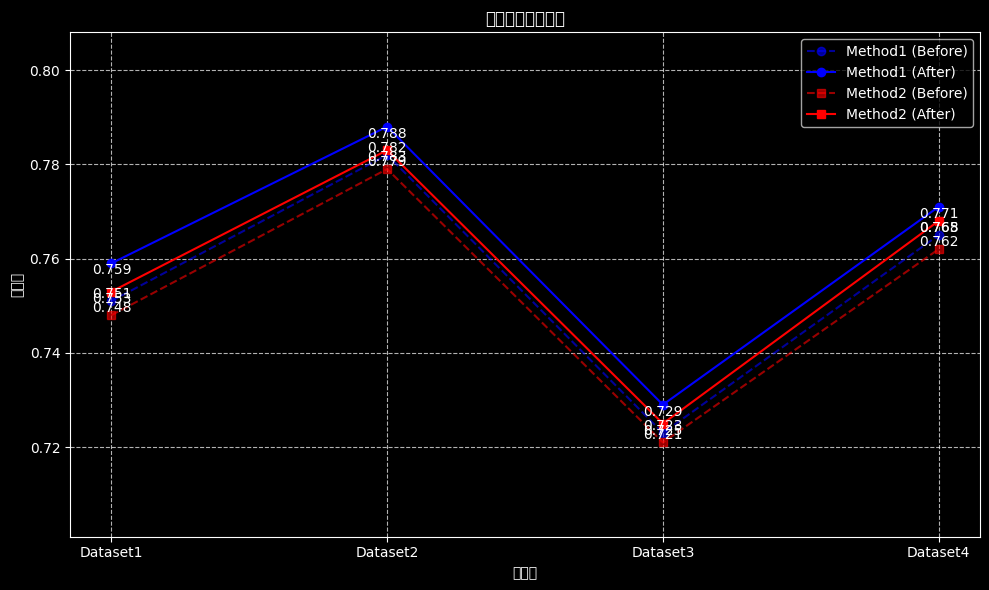

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
methods = ['Method1', 'Method2']
before = np.array([[0.751, 0.782, 0.723, 0.765],  # Method1
                   [0.748, 0.779, 0.721, 0.762]])  # Method2
after = np.array([[0.759, 0.788, 0.729, 0.771],   # Method1
                  [0.753, 0.783, 0.725, 0.768]])   # Method2

plt.figure(figsize=(10, 6))

# 绘制折线
plt.plot(datasets, before[0], 'o--', label='Method1 (Before)', color='blue', alpha=0.6)
plt.plot(datasets, after[0], 'o-', label='Method1 (After)', color='blue')
plt.plot(datasets, before[1], 's--', label='Method2 (Before)', color='red', alpha=0.6)
plt.plot(datasets, after[1], 's-', label='Method2 (After)', color='red')

# 设置y轴范围，突出显示差异
plt.ylim(min(before.min(), after.min()) - 0.02, max(before.max(), after.max()) + 0.02)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title('改进前后效果对比')
plt.ylabel('准确率')
plt.xlabel('数据集')

# 添加数值标签
for i in range(len(datasets)):
    for j in range(2):
        plt.text(i, before[j][i], f'{before[j][i]:.3f}', ha='center', va='bottom')
        plt.text(i, after[j][i], f'{after[j][i]:.3f}', ha='center', va='top')

plt.tight_layout()
plt.show()

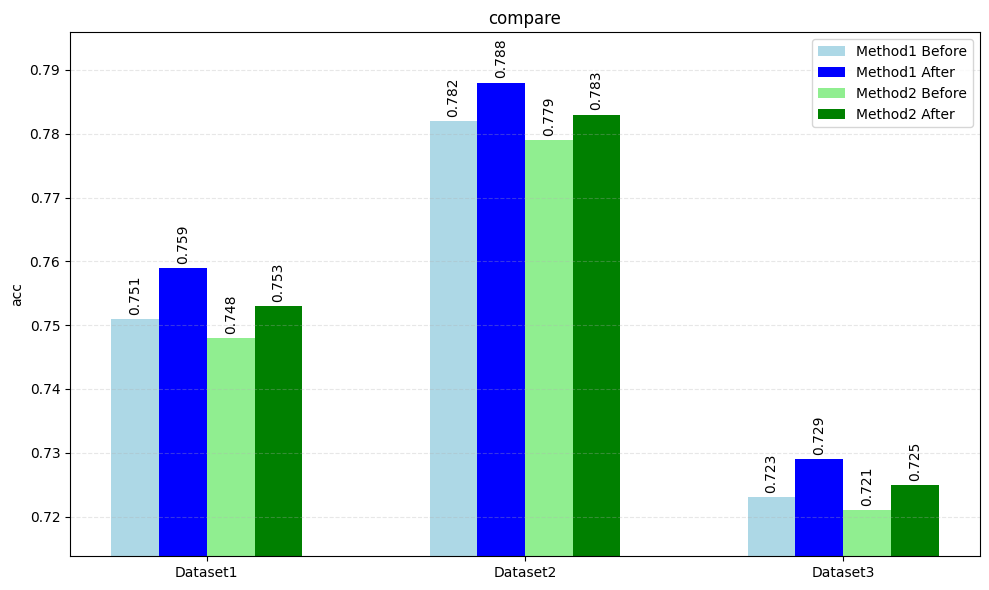

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
datasets = ['Dataset1', 'Dataset2', 'Dataset3']
methods = ['Method1', 'Method2']
before = np.array([[0.751, 0.782, 0.723],  # Method1在各数据集上的改进前结果
                   [0.748, 0.779, 0.721]])  # Method2在各数据集上的改进前结果
after = np.array([[0.759, 0.788, 0.729],   # Method1在各数据集上的改进后结果
                  [0.753, 0.783, 0.725]])   # Method2在各数据集上的改进后结果

# 设置柱状图位置
x = np.arange(len(datasets))
width = 0.15  # 柱子的宽度
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱状图
rects1 = ax.bar(x - width*1.5, before[0], width, label='Method1 Before', color='lightblue')
rects2 = ax.bar(x - width*0.5, after[0], width, label='Method1 After', color='blue')
rects3 = ax.bar(x + width*0.5, before[1], width, label='Method2 Before', color='lightgreen')
rects4 = ax.bar(x + width*1.5, after[1], width, label='Method2 After', color='green')

# 添加标签和标题
ax.set_ylabel('acc')
ax.set_title('compare')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.3, axis='y')

# 在柱子上添加数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3点垂直偏移
                   textcoords="offset points",
                   ha='center', va='bottom',
                   rotation=90)  # 旋转标签使其垂直显示

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# 调整y轴范围，突出显示差异
bottom = min(before.min(), after.min()) * 0.99  # 留出一点底部空间
top = max(before.max(), after.max()) * 1.01     # 留出一点顶部空间
plt.ylim(bottom, top)

plt.tight_layout()
plt.show()

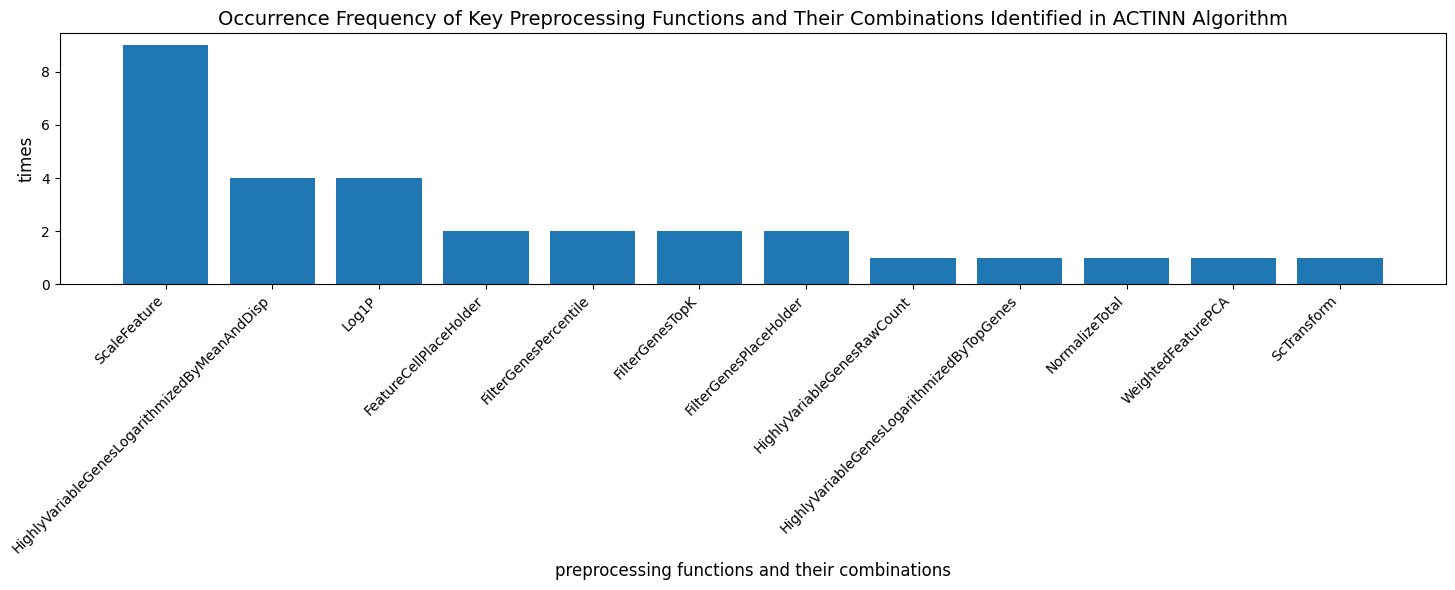

In [13]:
import matplotlib.pyplot as plt

# 数据
data = {'ScaleFeature': 9, 'HighlyVariableGenesRawCount': 1, 
        'FeatureCellPlaceHolder': 2, 'FilterGenesPercentile': 2, 
        'FilterGenesTopK': 2, 'HighlyVariableGenesLogarithmizedByMeanAndDisp': 4, 
        'Log1P': 4, 'FilterGenesPlaceHolder': 2, 'HighlyVariableGenesLogarithmizedByTopGenes': 1,
        'NormalizeTotal': 1, 'WeightedFeaturePCA': 1, 'ScTransform': 1}
# 创建图形
plt.figure(figsize=(15, 6))
data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
# 绘制柱状图
plt.bar(data.keys(), data.values())

# 设置标题和标签
plt.title('Occurrence Frequency of Key Preprocessing Functions and Their Combinations Identified in ACTINN Algorithm', fontsize=14)
plt.xlabel('preprocessing functions and their combinations', fontsize=12)
plt.ylabel('times', fontsize=12)

# 旋转x轴标签以防重叠
plt.xticks(rotation=45, ha='right')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [9]:
mdata=create_mock_mudata()

/home/zyxing/anaconda3/envs/dance-env/lib/python3.11/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [4]:
mod1,mod2=mdata.mod.values()

In [10]:
mdata.mod

{'mod1': AnnData object with n_obs × n_vars = 2 × 2,
 'mod2': AnnData object with n_obs × n_vars = 2 × 2}

In [1]:
import scanpy as sc
data=sc.read_h5ad(f"/home/zyxing/dance/tests/atlas/data/human_Brain576f193c-75d0-4a11-bd25-8676587e6dc2_data.h5ad")

In [4]:
data.obs["tissue"].cat.categories

Index(['brain'], dtype='object')